# Part 1: Perceptron

In part 1, I implement the perceptron algorithm from scratch and optimize it with
gradient descent. The data sets are two bivariate gaussian distributions centered at -2,-2 and 2,2, respectively.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Generate 50 samples from each of the two bivariate gaussian distributions with unit variance centered at (-2, -2), (2, 2) respectively.

In [2]:
n_samples = 50
c1_x, c1_y = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], n_samples).T
c2_x, c2_y = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], n_samples).T

X = np.concatenate((c1_x, c2_x))
Y = np.concatenate((c1_y, c2_y))
C = np.concatenate(([0] * n_samples, [1] * n_samples))
print(X.shape)
print(Y.shape)
print(C.shape)

(100,)
(100,)
(100,)


In [3]:
df = pd.DataFrame(
    {'x': X,
     'y': Y,
     'c': C,
    }
)

#shuffle df, in case that matters?
df = df.sample(frac=1).reset_index(drop=True)

df.c.value_counts()
df.head(10)

,x,y,c
0,-2.949693,-2.445140,0
1,4.155550,1.109938,1
2,-0.902928,-1.414713,0
3,2.897428,0.931271,1
4,-2.592329,-0.344814,0
5,2.814902,0.955810,1
6,0.833771,2.358280,1
7,2.662254,0.971530,1
8,2.224512,1.913609,1
9,3.144360,2.600461,1


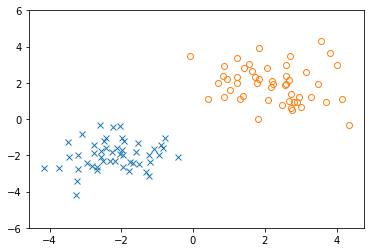

In [4]:
markers = {0: 'x', 1: 'o'}
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none')  
plt.ylim(-6, 6)
plt.show()

### Implement the perceptron algorithm from scratch and optimize it with gradient descent.

In [5]:
#assuming Y = mX + b formula

class perceptron:
    def __init__(self, X, Y, C):
        self.X = X
        self.Y = Y
        self.C = C
        
        #random vals so doesn't immediately equal a straight line
        self.bias = 1
        self.x_w = 1
        self.y_w = -1
        self.lr = 0.01
        
    def step_func(self, x):
        return 1 if (x > 0) else 0
    
    def pred_c(self, x, y):
        return self.step_func(x * self.x_w + y * self.y_w + self.bias)
    
    def update_weights(self, x, y, c):
        self.x_w = self.x_w + self.lr * (c - self.pred_c(x, y)) * x
        self.y_w = self.y_w + self.lr * (c - self.pred_c(x, y)) * y
        self.bias = self.bias + self.lr * (c - self.pred_c(x, y)) * self.bias
        return
    
    def train(self):
        n_incorrect = 0;
        for i, x in enumerate(self.X):
            c_pred = self.pred_c(x, self.Y[i])
            if self.C[i] != c_pred:
                n_incorrect+=1
                #no point updating if correct (c - pred_c == 0)
                self.update_weights(x, self.Y[i], self.C[i])
        return n_incorrect
                
    

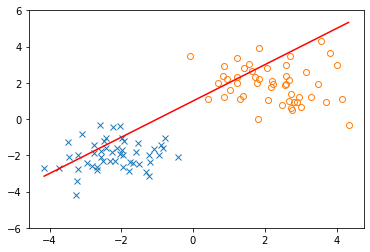

In [6]:
#show that looks terrible initially
percept = perceptron(df.x, df.y, df.c)

#turn into y = mx + b format from intercept + percept.x_w * x + percept.x_y * y
m = - percept.x_w / percept.y_w
b = - percept.bias / percept.y_w

# plot
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none') 
plt.plot([min(df.x), max(df.x)], [min(df.x) * m + b, max(df.x) * m + b], color='red')
plt.ylim(-6, 6)
plt.show()

In [7]:
#train
for i in range(50):
    n_incorrect = percept.train()
    print('Epoch {epoch}: {n}'.format(epoch = i+1, n = n_incorrect))
    
    if n_incorrect == 0:
        break;

Epoch 1: 22
Epoch 2: 9
Epoch 3: 4
Epoch 4: 2
Epoch 5: 1
Epoch 6: 1
Epoch 7: 1
Epoch 8: 1
Epoch 9: 1
Epoch 10: 1
Epoch 11: 1
Epoch 12: 1
Epoch 13: 1
Epoch 14: 1
Epoch 15: 0


### Plot the decision boundary for the two Gaussians.

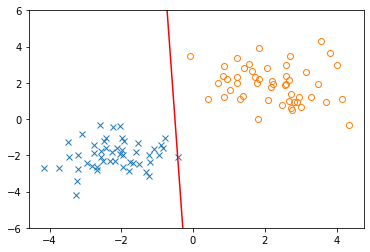

In [8]:
#plot again, should be beautiful!

#turn into y = mx + b format from intercept + percept.x_w * x + percept.x_y * y
m = - percept.x_w / percept.y_w
b = - percept.bias / percept.y_w

# plot
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none') 
plt.plot([min(df.x), max(df.x)], [min(df.x) * m + b, max(df.x) * m + b], color='red')
plt.ylim(-6, 6)
plt.show()

# Part 2: MultiClass Logistic regression (30 pts)
Generate 50 samples from each of the three bivariate gaussian distributions with unit variance centered
at (-2, -2), (1, 3), and (-3, 1) respectively. Implement a multi-class logistic regression with Softmax
function and optimize it with gradient descent. Plot the decision boundaries for the three Gaussians.
***The code and the outputs for problem 1 and problem 2 should be in a Jupyter Notebook saved as a
.html file. You can do this by opening your Jupyter notebook and going to File->Save and Export
Notebook As-> HTML

### Generate 50 samples from each of the three bivariate gaussian distributions with unit variance centered at (-2, -2), (1, 3), and (-3, 1) respectively.

In [44]:
n_samples = 50
c1_x, c1_y = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], n_samples).T
c2_x, c2_y = np.random.multivariate_normal([1, 3], [[1, 0], [0, 1]], n_samples).T
c3_x, c3_y = np.random.multivariate_normal([-3, 1], [[1, 0], [0, 1]], n_samples).T

X = np.concatenate((c1_x, c2_x, c3_x))
Y = np.concatenate((c1_y, c2_y, c3_y))
C = np.concatenate(([0] * n_samples, [1] * n_samples, [2] * n_samples))
print(X.shape)
print(Y.shape)
print(C.shape)

df = pd.DataFrame(
    {'x': X,
     'y': Y,
     'c': C,
    }
)
df.c.value_counts()

(150,)
(150,)
(150,)


0    50
1    50
2    50
Name: c, dtype: int64

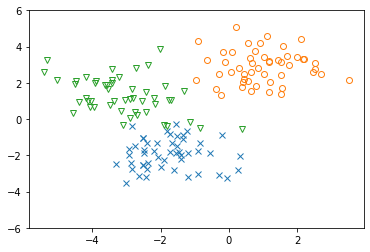

In [45]:
markers = {0: 'x', 1: 'o', 2: 'v'}
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none')  
plt.ylim(-6, 6)
plt.show()

### Implement a multi-class logistic regression with Softmax function and optimize it with gradient descent. 

In [46]:
#first lets get data into a single vector, trying to learn vector/matrix manipuations
data = np.column_stack((X, Y))
# print(data)

#we also need the classes to be one-hot encoded
#https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-one-hot-encoded-array-in-numpy
labels = np.zeros((C.size, C.max() + 1))
labels[np.arange(C.size), C] = 1
# print(labels)

In [47]:
class mc_logistic_regression:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.n_features = data.shape[1]
        self.n_classes = labels.shape[1]
        
        #for 2 features and 3 classes we need 6 weights (2x3 matrix)
        #am using random numbers cause of 
        #https://medium.com/geekculture/logistic-regression-implementation-from-scratch-in-python-f9d6cd4a0747
        #would 0's work?
        self.weights = np.random.randn(self.n_features, self.n_classes)
        self.intercepts = np.random.randn(1, self.n_classes)
        
        #for training
        self.lr = 0.001
        self.iterations = 10000
        
    def softmax(self, x):
        #equation for soft max is exp(x) / sum(exp(x)
        #per https://medium.com/geekculture/logistic-regression-implementation-from-scratch-in-python-f9d6cd4a0747
        #and https://stackoverflow.com/questions/43290138/softmax-function-of-a-numpy-array-by-row
        #should instead us x - max(x) which prevents overflow by making numbers smaller (what if theyre already negative?)
        
        #x is the vector of log odds (3 since 3 classes)
        #print(x)

        max_x = np.max(x, axis=-1, keepdims = True)
        # print(max_x)

        num = np.exp(x - max_x)
        # print(num)

        denom = np.sum(num, axis=-1, keepdims=True)
        # print(denom)

        return num/denom
        
    def get_logits(self, X):
        # X is the data (2 x n_samples)
        #logit is the log odds, which is X@w + b
        #this is the straight lined version from the statsquest video
        # print("Data")
        # print(X[:10])
        # print("Weights")
        # print(self.weights[:10])
        # print("Intercept")
        # print(self.intercepts[:10])
        # print("Data @ Weights + Intercept")
        # print(X[:10] @ self.weights[:10] + self.intercepts[:10])
        return X @ self.weights + self.intercepts
    
    def predict_probs(self, X):
        logits = self.get_logits(X) #returns 3xn_samples of logits

        #now use softmax
        return self.softmax(logits)
    
    def predict_classes(self, data):
        class_probs = self.predict_probs(data)
        class_preds = np.argmax(class_probs, axis=1)
        return class_preds
        
    def update_weights(self, class_probs):
        n = self.data.shape[0] #number of samples
        
        #gradient w.r.t. weights is:
        dW = (1 / n) * (X.T @ (class_probs - self.labels))
        # print('Gradient w.r.t. weights')
        # print(dW)
        # print('Gradient * learning rate')
        # print(dW * self.lr)
        dInt = (1 / n) * np.sum((class_probs - self.labels), axis=0, keepdims=True)
        
        #given gradients, update weights and intercept
        # print("Old Weights")
        # print(self.weights)
        self.weights = self.weights - self.lr * dW
        # print("New Weights")
        # print(self.weights)
        self.intercepts = self.intercepts - self.lr * dInt
        
    def pred_accuracy(self):
        #get predictions
        predictions = self.predict_classes(self.data)
        
        #convert labels away from one-hot encoding with np.argmax
        return sum(predictions == np.argmax(self.labels, axis=1)) / len(self.labels)
        
    def train(self, verbose = False):
        losses = np.zeros(self.iterations)
        for i in range(1, self.iterations + 1):
            class_probs = self.predict_probs(self.data)
            
            # for loss, np.log is log probability of each class, 
            # times one-hot encoded labels gives you just prob of that true class, 
            # then added together, then - since we're minimizing the negative
            # log likelihood
            loss = - np.sum(self.labels * np.log(class_probs))
            losses[i - 1] = loss;
            self.update_weights(class_probs)
            if verbose:
                if i % 1000 == 1:
                    print("-" * 10)
                    print("Iteration: {}".format(i))
                    print("Loss: {}".format(loss))
                    print("Accuracy: {}".format(self.pred_accuracy()))
        
        return losses
        
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [60]:
#initialize logistic regression
logreg = mc_logistic_regression(data, labels)

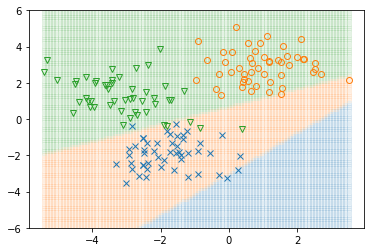

In [61]:
#plot, should look terrible to start with

#prepare for background (shows decision boundaries)
xs = np.linspace(min(df.x), max(df.x), num=100)
ys = np.linspace(-6,6, num=100)

newX = []
for x1 in xs:
  for x2 in ys:
    newX.append((x1, x2))
newX = np.array(newX)

finX = np.column_stack((newX, logreg.predict_classes(newX)))

#class 0
flg = (finX[:, 2] == 0)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:blue", marker="s", s=20)
#class 1
flg = (finX[:, 2] == 1)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:orange", marker="s", s=20)
#class 2
flg = (finX[:, 2] == 2)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:green", marker="s", s=20)

#now plot data points (from above)
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none')  
plt.ylim(-6, 6)

plt.show()

In [62]:
#Train logistic regression
losses = logreg.train(verbose = True)

print("Final accuracy:")
logreg.pred_accuracy()

----------
Iteration: 1
Loss: 348.7720595205462
Accuracy: 0.32666666666666666
----------
Iteration: 1001
Loss: 120.21896346600579
Accuracy: 0.64
----------
Iteration: 2001
Loss: 72.50721262945639
Accuracy: 0.7866666666666666
----------
Iteration: 3001
Loss: 53.244804912599676
Accuracy: 0.8533333333333334
----------
Iteration: 4001
Loss: 42.9316414792519
Accuracy: 0.8866666666666667
----------
Iteration: 5001
Loss: 36.57349695460006
Accuracy: 0.9
----------
Iteration: 6001
Loss: 32.297230304178605
Accuracy: 0.9333333333333333
----------
Iteration: 7001
Loss: 29.243161335090758
Accuracy: 0.9333333333333333
----------
Iteration: 8001
Loss: 26.962690536981203
Accuracy: 0.94
----------
Iteration: 9001
Loss: 25.199691205902266
Accuracy: 0.9466666666666667
Final accuracy:


0.9466666666666667

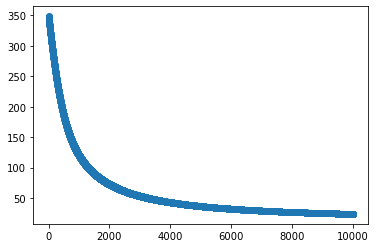

In [63]:
#plot losses over time
plt.scatter(np.arange(len(losses)), losses)

### Plot the decision boundaries for the three Gaussians

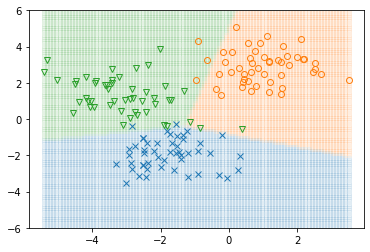

In [64]:
#plot again, should look terrific this time!

#prepare for background (shows decision boundaries)
xs = np.linspace(min(df.x), max(df.x), num=100)
ys = np.linspace(-6,6, num=100)

newX = []
for x1 in xs:
  for x2 in ys:
    newX.append((x1, x2))
newX = np.array(newX)

finX = np.column_stack((newX, logreg.predict_classes(newX)))

#class 0
flg = (finX[:, 2] == 0)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:blue", marker="s", s=20)
#class 1
flg = (finX[:, 2] == 1)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:orange", marker="s", s=20)
#class 2
flg = (finX[:, 2] == 2)
plt.scatter(finX[flg,0], finX[flg,1], alpha=0.05, c="tab:green", marker="s", s=20)

#now plot data points (from above)
for group in df.c.unique():
    plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none')  
plt.ylim(-6, 6)

plt.show()

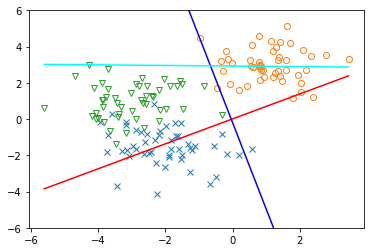

In [18]:
# #this was the old method i tried, sort of deriving individual decision boundaries. 
# # But, this doesn't work because multiclass logistic regression isn't really learning decision boundaries like 
# # simple logistic regression is

# #plot initially, should be terrible
# weights = logreg.weights
# intercepts = logreg.intercepts

# #turn into y = mx + b format from intercept + percept.x_w * x + percept.x_y * y
# m0 = - weights.T[0][0] / weights.T[0][1]
# b0 = - intercepts[0][0] / weights.T[0][1]

# m1 = - weights.T[1][0] / weights.T[1][1]
# b1 = - intercepts[0][1] / weights.T[1][1]

# m2 = - weights.T[2][0] / weights.T[2][1]
# b2 = - intercepts[0][2] / weights.T[2][1]

# # plot
# markers = {0: 'x', 1: 'o', 2: 'v'}
# for group in df.c.unique():
#     plt.plot(df.x[df.c == group], df.y[df.c == group], marker = markers[group], linestyle='', fillstyle='none')  
# plt.plot([min(df.x), max(df.x)], [min(df.x) * m0 + b0, max(df.x) * m0 + b0], color='red')
# plt.plot([min(df.x), max(df.x)], [min(df.x) * m1 + b1, max(df.x) * m1 + b1], color='blue')
# plt.plot([min(df.x), max(df.x)], [min(df.x) * m2 + b2, max(df.x) * m2 + b2], color='cyan')
# plt.ylim(-6, 6)
# plt.show()